Enter the stock name : aapl


[*********************100%%**********************]  1 of 1 completed
variance is: 13.933333333333334
expectation is: 22.0


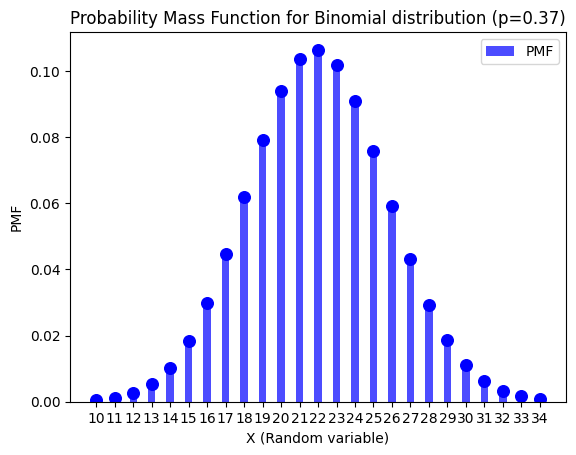

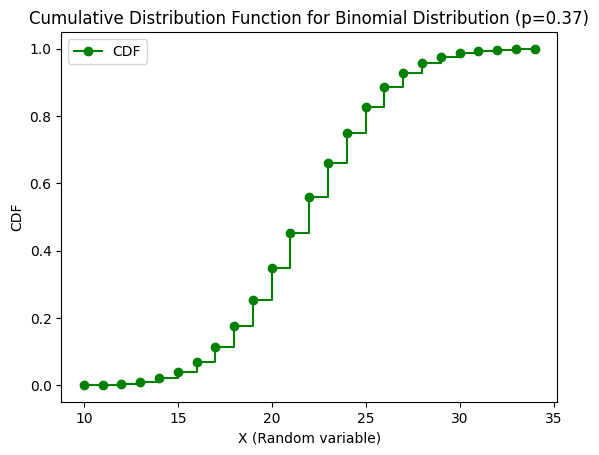

In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
import yfinance as yf
from datetime import datetime
import numpy as np
from math import comb

# Specify the start date
start_date = "2019-01-01"

# Set the end date to the current date
end_date = datetime.today().strftime('%Y-%m-%d')

#choose stock type you want
stock = input("Enter the stock name :")

# Download historical data for AAPL on a monthly basis from the start date to the current date
aapl_data = yf.download(stock, start=start_date, end=end_date, interval="1mo")


# Resetting index for easier manipulation
aapl_data.reset_index(inplace=True)

# Sorting data by date in descending order for data analysis
aapl_data.sort_values(by="Date", ascending=False, inplace=True)

# Checking for null values for data cleaning
#print(aapl_data.isnull().sum())

# Checking data types consistency for data checking
#aapl_data.info()

# Calculating daily returns (to count number of successes i.e. increasing stock
aapl_data['Daily Return'] = aapl_data['Adj Close'].pct_change() * 100

# Number of days and success probability
trials = len(aapl_data)
success_prob = aapl_data['Daily Return'].gt(0).sum() / len(aapl_data)

#Generate binomial random variables
def generate_binomial(n, p, size):
    random_variables = np.random.binomial(n=n, p=p, size=size)
    return random_variables  # Return the list of generated random variables

# Function to calculate binomial PMF
def binomial_pmf(k, n, p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Function to calculate binomial CDF
def binomial_cdf(k, n, p):
    cdf = 0.0
    for i in range(k + 1):
        cdf += binomial_pmf(i, n, p)
    return cdf

# Function to calculate binomial expectation (mean)
def binomial_expectation(n, p):
    return n * p

# Function to calculate binomial variance
def binomial_variance(n, p):
    return n * p * (1 - p)

#plot pmf
def plot_pmf(n, p, size):
    pmf_values = [binomial_pmf(k, n, p) for k in unique_values]
    plt.bar(unique_values, pmf_values, color='blue', alpha=0.7, width = 0.4, label='PMF')
    plt.scatter(unique_values, pmf_values, color='blue', marker='o', s = 70)
    plt.xticks(unique_values)
    plt.xlabel('X (Random variable)')
    plt.ylabel('PMF')
    plt.title(f'Probability Mass Function for Binomial distribution (p={p:.2f})')
    plt.legend()
    plt.show()

#plot cdf
def plot_cdf(n, p, size):
    y_ecdf = [binomial_cdf(k, n, p) for k in unique_values]
    plt.step(unique_values, y_ecdf, color='green', marker='o', where='post', label='CDF')
    plt.title(f'Cumulative Distribution Function for Binomial Distribution (p={p:.2f})')
    plt.xlabel('X (Random variable)')
    plt.ylabel('CDF')
    plt.legend()
    plt.show()


#set parameters extracted from the data
p = success_prob
n = trials    
size = 1000

#store generated binomial random variables
binomial_random_variables = generate_binomial(n, p, size)

#make an array of generated random variables and take unique values
unique_values, counts = np.unique(binomial_random_variables, return_counts=True)


# Print expectation and variance
print("variance is:", binomial_variance(n, p))
print("expectation is:", binomial_expectation(n, p))

#show results
plot_pmf(n, p, size)
plot_cdf(n, p, size)